<a href="https://colab.research.google.com/github/apriandito/dl-python/blob/main/CNN_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Spam Detection**

### **Import Packages**

In [45]:
# Install TensorFlow
# !pip install -q tensorflow-gpu==2.0.0-beta1

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.
2.5.0


In [46]:
# Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Embedding
from tensorflow.keras.models import Model

### **Load Dataset**

In [47]:
# Load Data
df = pd.read_csv('https://raw.githubusercontent.com/apriandito/dl-python/main/data/spam.csv', encoding='ISO-8859-1')

In [48]:
# Show 5 first row
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### **Data Preprocessing**

In [49]:
# Drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [50]:
# Show 5 first row
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
# Rename columns
df.columns = ['labels', 'data']

In [52]:
# Show 5 first row
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [53]:
# Encode to binary labels (ham to 1, spam to 1)
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [54]:
# Split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.30)

In [55]:
# Convert sentences(text) to sequences (integers)
max_vocab_size = 20000
tokenizer = Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [56]:
# See train sequence
sequences_train

[[44,
  77,
  1,
  3512,
  18,
  49,
  2346,
  2347,
  40,
  4,
  509,
  18,
  1124,
  639,
  6,
  235,
  18,
  69,
  10,
  66,
  26,
  154],
 [119,
  218,
  84,
  12,
  5,
  236,
  919,
  95,
  9,
  5,
  350,
  16,
  93,
  693,
  1125,
  3513,
  12,
  133,
  464,
  920,
  19,
  3,
  363,
  600,
  7,
  79,
  58,
  219,
  129,
  43,
  42,
  102,
  180,
  4,
  3514,
  921],
 [84, 76, 20, 41, 9, 11, 640, 104, 7, 1, 427, 1126, 14, 62, 1012],
 [2, 17, 118, 573, 220, 198, 1310, 15, 922, 733, 1513, 2348, 22],
 [251,
  1,
  781,
  6,
  1013,
  2349,
  58,
  44,
  176,
  1311,
  445,
  291,
  734,
  31,
  510,
  734,
  340,
  1312],
 [51,
  5,
  230,
  1842,
  9,
  4,
  694,
  75,
  5,
  3515,
  3516,
  1313,
  3517,
  8,
  5,
  3518,
  3519,
  574,
  41,
  5,
  1314,
  16,
  3520,
  37,
  2350,
  1127],
 [150, 75, 641, 693, 2],
 [3521, 144, 14, 3, 735, 16, 1315, 64, 2351, 7, 1316, 1315, 21, 846],
 [1, 483, 1014, 1514, 1843, 48, 2352, 408, 7, 14, 1317, 53, 409, 2353],
 [44, 1, 1013, 30, 6, 54, 

In [57]:
# Get word index from the sequence 
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7441 unique tokens.


In [58]:
# Print index of word
word2idx

{'i': 1,
 'you': 2,
 'to': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'call': 15,
 'of': 16,
 'have': 17,
 '2': 18,
 'on': 19,
 'that': 20,
 'are': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'or': 26,
 'can': 27,
 'if': 28,
 'at': 29,
 'do': 30,
 'ur': 31,
 'just': 32,
 "i'm": 33,
 'be': 34,
 'get': 35,
 'with': 36,
 'will': 37,
 'no': 38,
 'we': 39,
 '4': 40,
 'this': 41,
 'gt': 42,
 'lt': 43,
 'ok': 44,
 'up': 45,
 'how': 46,
 'what': 47,
 'from': 48,
 'go': 49,
 'free': 50,
 'when': 51,
 'all': 52,
 'out': 53,
 'know': 54,
 'like': 55,
 'good': 56,
 'then': 57,
 'its': 58,
 'got': 59,
 'was': 60,
 'am': 61,
 'love': 62,
 'time': 63,
 'only': 64,
 'come': 65,
 'there': 66,
 'day': 67,
 'he': 68,
 'send': 69,
 'text': 70,
 'need': 71,
 'as': 72,
 'want': 73,
 'by': 74,
 'one': 75,
 'about': 76,
 'lor': 77,
 'back': 78,
 'see': 79,
 'txt': 80,
 'home': 81,
 'going': 82,
 "i'll": 83,
 'sorry': 84,
 '

In [59]:
# Pad sequences to ensure that all sequences in a list have the same length
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# Get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3900, 189)


In [60]:
# Example of train data
data_train[1]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [61]:
# Also in test data
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1672, 189)


### **Modeling**

In [62]:
# Create the model
i = Input(shape=(T,))
x = Embedding(V + 1, 20)(i)
x = Conv1D(32, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64, 3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128, 3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [63]:
# Train model
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

# Print training process
print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=5,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/5
122/122 [==============================] - 2s 12ms/step - loss: 0.3894 - accuracy: 0.8595 - val_loss: 0.2737 - val_accuracy: 0.8648
Epoch 2/5
122/122 [==============================] - 1s 8ms/step - loss: 0.1324 - accuracy: 0.9397 - val_loss: 0.1250 - val_accuracy: 0.9671
Epoch 3/5
122/122 [==============================] - 1s 8ms/step - loss: 0.0225 - accuracy: 0.9936 - val_loss: 0.0771 - val_accuracy: 0.9803
Epoch 4/5
122/122 [==============================] - 1s 8ms/step - loss: 0.0068 - accuracy: 0.9985 - val_loss: 0.0786 - val_accuracy: 0.9785
Epoch 5/5
122/122 [==============================] - 1s 8ms/step - loss: 0.0029 - accuracy: 0.9997 - val_loss: 0.0908 - val_accuracy: 0.9809


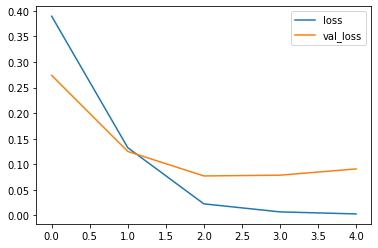

In [64]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

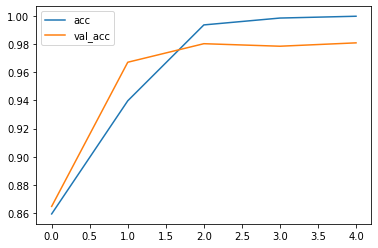

In [65]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()